In [19]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy.stats import kurtosis
np.random.seed(1)

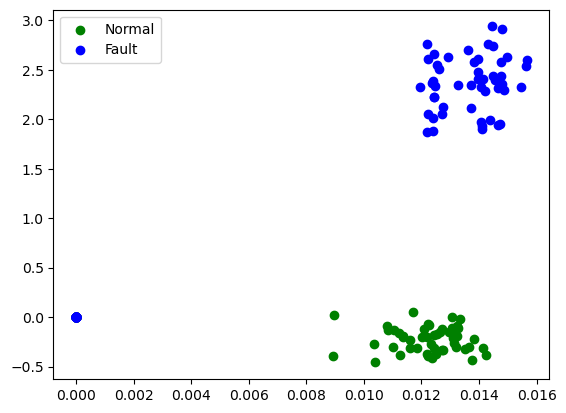

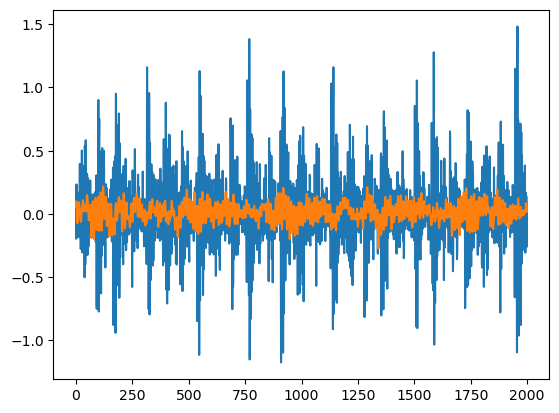

In [20]:
# Data generation
mat1 = sio.loadmat('Bearing/N_0.mat')
data1 = mat1['X097_DE_time']
mat2 = sio.loadmat('Bearing/IR007_0.mat')
data2 = mat2['X105_DE_time']
x1 = np.zeros([100,3])
x2 = np.zeros([100,3])
for i in range(50):
    x1[i, 0] = np.mean(data1[i*2000:(i+1)*2000]) 
    x1[i, 1] = np.std(data1[i*2000:(i+1)*2000]) 
    x1[i, 2] = kurtosis(data1[i*2000:(i+1)*2000])
    x2[i, 0] = np.mean(data2[i*2000:(i+1)*2000]) 
    x2[i, 1] = np.std(data2[i*2000:(i+1)*2000]) 
    x2[i, 2] = kurtosis(data2[i*2000:(i+1)*2000])

plt.scatter(x1[:,0],x1[:,2], c='green',label = 'Normal')
plt.scatter(x2[:,0],x2[:,2], c='blue',label = 'Fault')
plt.legend()
plt.figure()
plt.plot(np.arange(2000),data2[0:2000])
plt.plot(np.arange(2000),data1[0:2000])

In [21]:
#initialize cluster centroids
def Centroids_Init(X, N_clusters):
    index_random = np.random.permutation(X.shape[0])
    centroids = X[index_random[:N_clusters]]
    print(index_random)
    return centroids

In [22]:
# compute distance from samples to centroids of clusters
def Compute_Distance(X, Centroids):
    distance = np.zeros((X.shape[0],Centroids.shape[0]))
    for i in range(Centroids.shape[0]):
        distance[:,i] = np.square(norm(X-Centroids[i],axis = 1))
    return distance        

In [23]:
# find the closest clusters
def Assign_Samples(Distance):
    Sample_Cluster_Label = np.argmin(Distance, axis = 1)
    return Sample_Cluster_Label

In [24]:
# compute centroids of clusters
def Compute_Centroids(X, Labels, N_Clusters):
    Centroid = np.zeros((N_Clusters, X.shape[1]))
    for i in range(N_Clusters):
        Centroid[i,:] = np.mean(X[Labels == i,:], axis = 0)
    return Centroid

In [25]:
def Scatter_Plot(X, Labels, Centroids):
    plt.figure()
    for i in range(Centroids.shape[0]):
        plt.scatter(X[Labels == i,0],X[Labels == i,1], label = 'Cluster' +str(i))
    plt.scatter(Centroids[:, 0], Centroids[:, 1], marker='*', s=300, c='r', label='Centroid')
    plt.legend()

In [26]:
def loss(X,Labels, Centroids):
    distance = np.zeros((X.shape[0],1))
    for i in range(X.shape[0]):
        distance[i] = np.square(norm(X[i,:] - Centroids[Labels[i],:]))
    Distance = np.mean(distance, axis = 0)
    return Distance   

[ 58  40  34 102 184 198  95   4  29 168 171  18  11  89 110 118 159  35
 136  59  51  16  44  94  31 162  38  28 193  27  47 165 194 177 176  97
 174  73  69 172 108 107 189  14  56  19 114  39 185 124  98 123 119  53
  33 179 181 106 199 138 116  67  78  42  17   5 127 105  48  66  54  84
 183 158 166 113  12 117  93 120 154  90  81 122 191  13  82 132 187  45
  99  36 161 186 153 103 195 197 148 173  75  21  91 152   2  70  85 150
   6 112   0 155  77  65  55 167  88 130  46  62  74  92 147 160 143  87
 180 145 164  10  32  83 182 100 125  23 126   9 170 104 151 135 111 188
  64  15  41 163 109  80  52  26  76  43  24   3 169  49 149 131 190  30
 121 115 175   8  60 128   1  57  22  61  63   7 196 141  86  96  68  50
 142 157 156 139 146 101  20 178  25 134  71 129 144 192  79 133 137  72
 140  37]


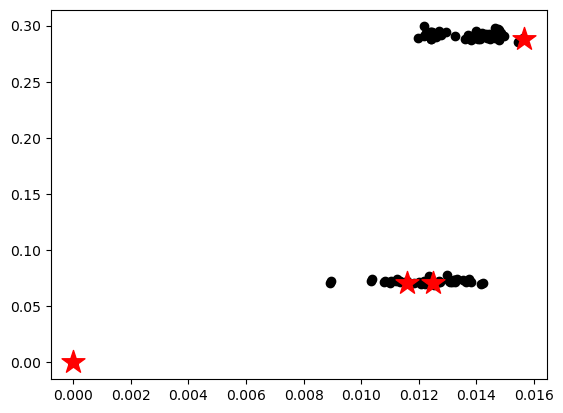

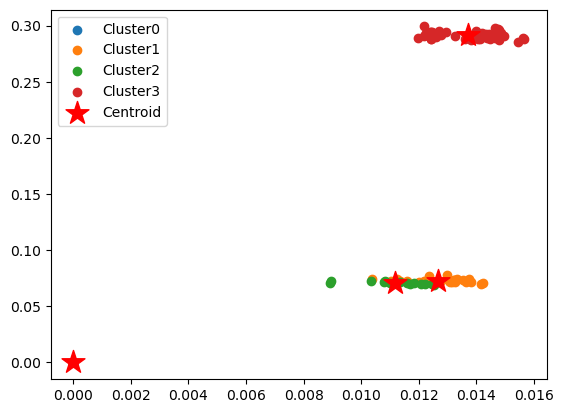

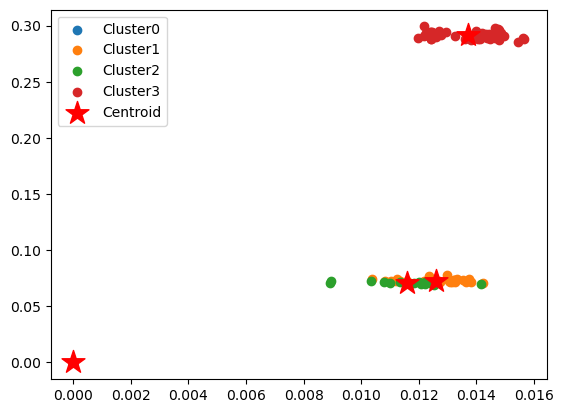

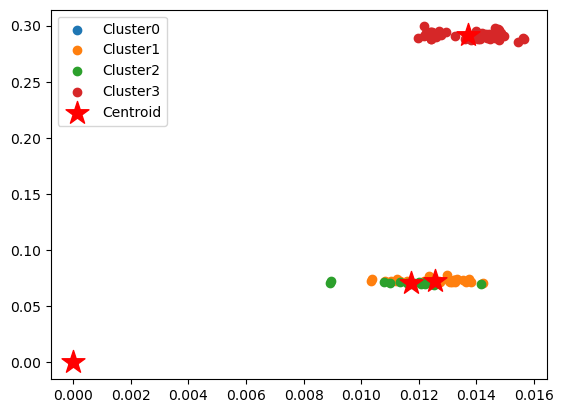

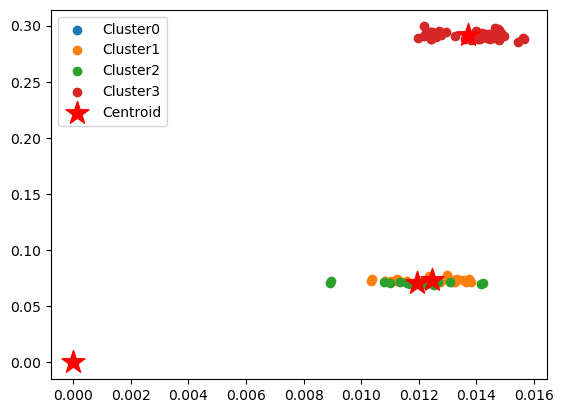

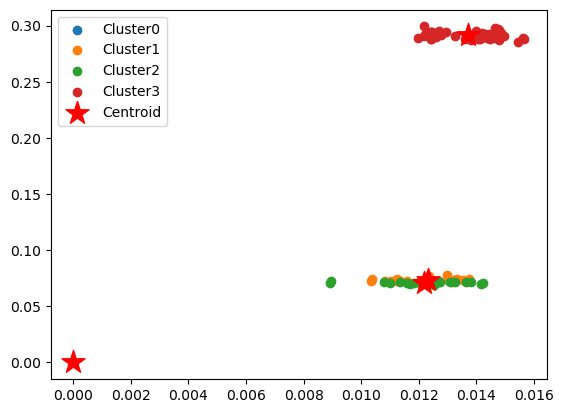

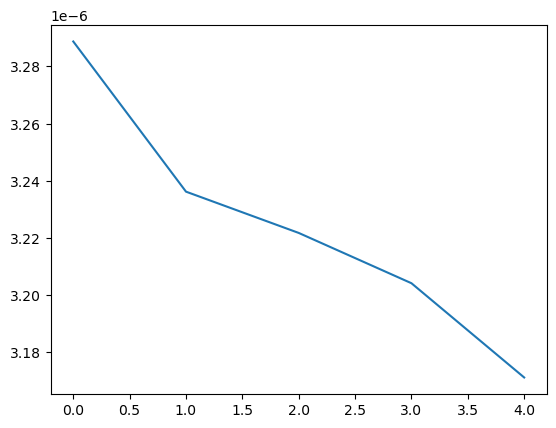

In [27]:
# Main function
X = np.concatenate((x1[:,[0,1]],x2[:,[0,1]]),axis=0)
N_Clusters = 4
N_Iter = 5
Centroids = Centroids_Init(X, N_Clusters)
plt.figure()
plt.scatter(X[:,0],X[:,1], c='black')
plt.scatter(Centroids[:, 0], Centroids[:, 1], marker='*', s=300, c='r', label='Centroid')
Loss = np.zeros(N_Iter)
for i in range(N_Iter):
    Distance = Compute_Distance(X,Centroids)
    Labels = Assign_Samples(Distance)
    Centroids = Compute_Centroids(X, Labels, N_Clusters)
    Scatter_Plot(X, Labels, Centroids)
    Loss[i] = loss(X,Labels, Centroids)
plt.figure()
plt.plot(np.arange(N_Iter), Loss)